<a href="https://colab.research.google.com/github/Danuzco/DL_onevarfunc/blob/main/nn_to_model_functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Deep Learning architecture to model distinct functions

In this notebook, I am going to show how a very simple deep learning architecture can be trained to model distinct functions. To keep it simple, I am going to model only one variables real functions $f(x)$.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Let us first try it for a linear function $f(x)  =  ax + b$. I am going to write $y$ in place of $f(x)$.

In [2]:
dataset_size = 50

a = 3
b = 1
# Chose values randomly in the [-10,10] range

x = 10*np.random.rand(dataset_size)-5
x_line = np.sort(x)
y_line = a*x_line + b

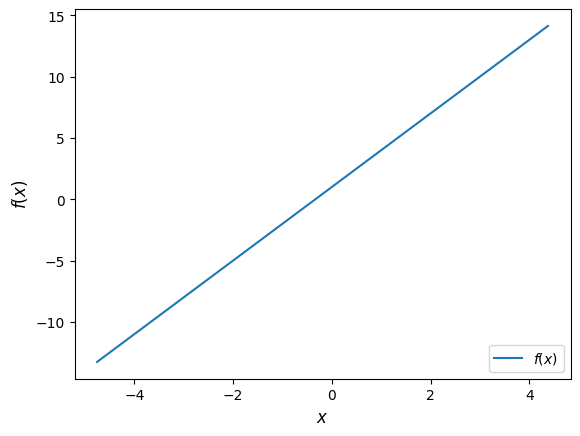

In [3]:
# Let's first plot the line
plt.plot(x_line,y_line,label=r"$f(x)$")

plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f(x)$", fontsize=12)
plt.legend(loc="lower right")
plt.show()

### Now, let us train a deep neural network using the data (x,y) from above and then see how close are the predictions from the trained network for new intup data x_new.

In [4]:
fraction  = 0.9

# Make a copy of the original data
x_copy = x_line.copy()
y_copy = y_line.copy()

data = np.hstack((x_copy.reshape(-1,1),y_copy.reshape(-1,1)))
np.random.shuffle(data)
training_data = data[:int(fraction * len(data))]
test_data = data[int(fraction * len(data)):]

In [5]:
import torch
from torch import nn

from torch.utils.data import DataLoader, TensorDataset

In [6]:
batch_size = 10

training_dataset = TensorDataset(torch.Tensor(training_data[:,0].reshape(-1,1)),torch.Tensor(training_data[:,1].reshape(-1,1)))
training_dataloader = DataLoader(training_dataset, batch_size=batch_size)

test_dataset = TensorDataset(torch.Tensor(test_data[:,0].reshape(-1,1)),torch.Tensor(test_data[:,1].reshape(-1,1)))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

In [19]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear = nn.Sequential(
            nn.Linear(1,100),
            nn.ReLU(),
            nn.Linear(100,500),
            nn.ReLU(),
            nn.Linear(500,500),
            nn.ReLU(),
            nn.Linear(500,1)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear(x)
        return logits

model = NeuralNetwork()

In [20]:
learning_rate = 1e-4

# loss function
loss_fn = nn.MSELoss()

# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"Train loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [22]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error -> Avg loss: {test_loss:>8f}\n")
    #print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [23]:
epochs = 300
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(training_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Train loss: 67.313194  [   10/   45]
Test Error -> Avg loss: 68.254219

Epoch 2
-------------------------------
Train loss: 61.513489  [   10/   45]
Test Error -> Avg loss: 62.799000

Epoch 3
-------------------------------
Train loss: 56.514030  [   10/   45]
Test Error -> Avg loss: 57.572945

Epoch 4
-------------------------------
Train loss: 51.769279  [   10/   45]
Test Error -> Avg loss: 52.409607

Epoch 5
-------------------------------
Train loss: 47.056194  [   10/   45]
Test Error -> Avg loss: 47.213020

Epoch 6
-------------------------------
Train loss: 42.305050  [   10/   45]
Test Error -> Avg loss: 41.870892

Epoch 7
-------------------------------
Train loss: 37.431324  [   10/   45]
Test Error -> Avg loss: 36.390358

Epoch 8
-------------------------------
Train loss: 32.445107  [   10/   45]
Test Error -> Avg loss: 30.864294

Epoch 9
-------------------------------
Train loss: 27.393137  [   10/   45]
Test Error -> Avg loss: 25.

In [24]:
# Generate new data (unseen by model) to see the predictions from the trained NN.

x_new = np.sort((10*np.random.rand(30)-5).reshape(-1,1))
x_new = torch.Tensor(x_new)
y_pred = model(x_new).detach().numpy()

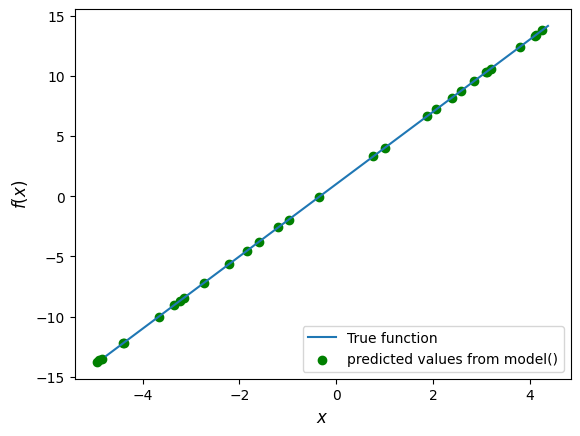

In [25]:
plt.plot(x_line,y_line, label="True function")
plt.scatter(x_new,y_pred.reshape(-1),c='g', label="predicted values from model()")
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f(x)$", fontsize=12)
plt.legend(loc = "lower right")

### Now, let us pack all this and train the same DL architecture (defined in the class NeuralNetwork() above) for data from more complex functions.

## Quadratic Function
## $f(x) = (x-a)^2+b$

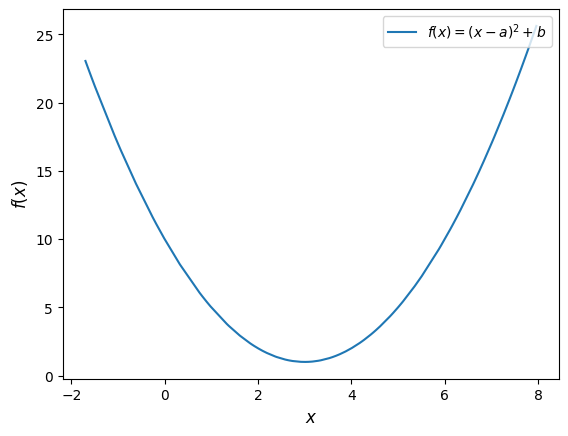

In [26]:
dataset_size = 100

a = 3
b = 1

x = 10*np.random.rand(dataset_size)-2
x_quadratic = np.sort(x)
y_quadratic = (x_quadratic-a)**2 + b

plt.plot(x_quadratic,y_quadratic,label=r"$f(x) = (x-a)^2+b$")

plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f(x)$", fontsize=12)
plt.legend(loc="upper right")
plt.show()

In [27]:
fraction  = 0.9

# Make a copy of the original data
x_copy = x_quadratic.copy()
y_copy = y_quadratic.copy()

data = np.hstack((x_copy.reshape(-1,1),y_copy.reshape(-1,1)))
np.random.shuffle(data)
training_data = data[:int(fraction * len(data))]
test_data = data[int(fraction * len(data)):]

batch_size = 10

training_dataset = TensorDataset(torch.Tensor(training_data[:,0].reshape(-1,1)),torch.Tensor(training_data[:,1].reshape(-1,1)))
training_dataloader = DataLoader(training_dataset, batch_size=batch_size)

test_dataset = TensorDataset(torch.Tensor(test_data[:,0].reshape(-1,1)),torch.Tensor(test_data[:,1].reshape(-1,1)))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

model2 = NeuralNetwork()

learning_rate = 1e-4

# loss function
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model2.parameters(), lr=learning_rate)

epochs = 300
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(training_dataloader, model2, loss_fn, optimizer)
    test(test_dataloader, model2, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Train loss: 201.894913  [   10/   90]
Test Error -> Avg loss: 144.355148

Epoch 2
-------------------------------
Train loss: 179.906036  [   10/   90]
Test Error -> Avg loss: 122.554031

Epoch 3
-------------------------------
Train loss: 162.138733  [   10/   90]
Test Error -> Avg loss: 102.463844

Epoch 4
-------------------------------
Train loss: 145.150879  [   10/   90]
Test Error -> Avg loss: 83.193077

Epoch 5
-------------------------------
Train loss: 128.030014  [   10/   90]
Test Error -> Avg loss: 66.203232

Epoch 6
-------------------------------
Train loss: 111.486557  [   10/   90]
Test Error -> Avg loss: 53.487465

Epoch 7
-------------------------------
Train loss: 97.046043  [   10/   90]
Test Error -> Avg loss: 45.659157

Epoch 8
-------------------------------
Train loss: 85.775833  [   10/   90]
Test Error -> Avg loss: 40.812733

Epoch 9
-------------------------------
Train loss: 77.164597  [   10/   90]
Test Error -> Avg 

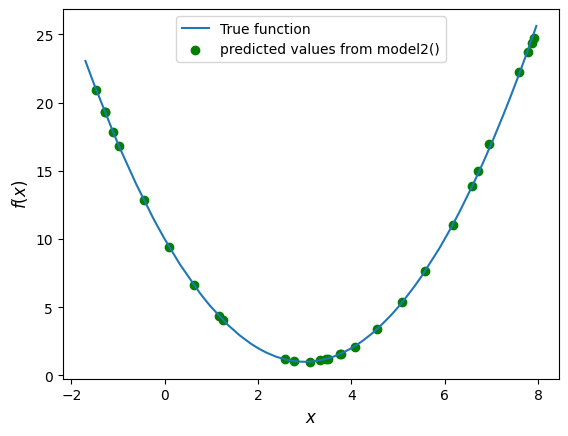

In [28]:
x_new = np.sort((10*np.random.rand(30)-2).reshape(-1,1))
x_new = torch.Tensor(x_new)
y_pred = model2(x_new).detach().numpy()

plt.plot(x_quadratic,y_quadratic, label="True function")
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f(x)$", fontsize=12)
plt.scatter(x_new,y_pred.reshape(-1),c='g', label="predicted values from model2()")
plt.legend(loc = "upper center")

### $f(x) = sin(x)$

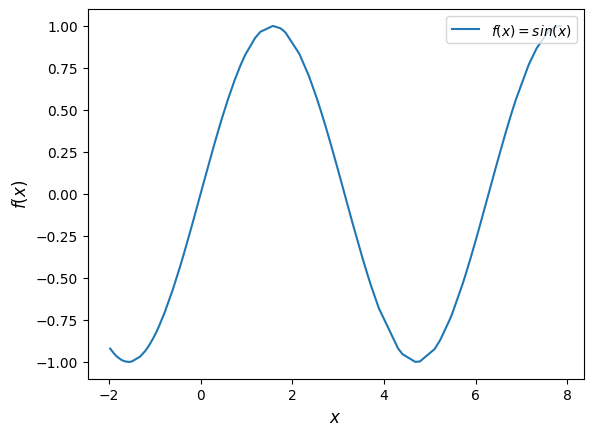

In [29]:
dataset_size = 100

x = 10*np.random.rand(dataset_size)-2
x_sin = np.sort(x)
y_sin = np.sin(x_sin)

plt.plot(x_sin,y_sin,label=r"$f(x) = sin(x)$")

plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f(x)$", fontsize=12)
plt.legend(loc="upper right")
plt.show()

In [30]:
fraction  = 0.9

# Make a copy of the original data
x_copy = x_sin.copy()
y_copy = y_sin.copy()

data = np.hstack((x_copy.reshape(-1,1),y_copy.reshape(-1,1)))
np.random.shuffle(data)
training_data = data[:int(fraction * len(data))]
test_data = data[int(fraction * len(data)):]

batch_size = 10

training_dataset = TensorDataset(torch.Tensor(training_data[:,0].reshape(-1,1)),torch.Tensor(training_data[:,1].reshape(-1,1)))
training_dataloader = DataLoader(training_dataset, batch_size=batch_size)

test_dataset = TensorDataset(torch.Tensor(test_data[:,0].reshape(-1,1)),torch.Tensor(test_data[:,1].reshape(-1,1)))
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

model3 = NeuralNetwork()

learning_rate = 1e-4

# loss function
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model3.parameters(), lr=learning_rate)

epochs = 300
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(training_dataloader, model3, loss_fn, optimizer)
    test(test_dataloader, model3, loss_fn)
print("Done!")

Epoch 1
-------------------------------
Train loss: 0.650158  [   10/   90]
Test Error -> Avg loss: 0.315382

Epoch 2
-------------------------------
Train loss: 0.382335  [   10/   90]
Test Error -> Avg loss: 0.244149

Epoch 3
-------------------------------
Train loss: 0.332661  [   10/   90]
Test Error -> Avg loss: 0.180476

Epoch 4
-------------------------------
Train loss: 0.272667  [   10/   90]
Test Error -> Avg loss: 0.166077

Epoch 5
-------------------------------
Train loss: 0.250595  [   10/   90]
Test Error -> Avg loss: 0.146803

Epoch 6
-------------------------------
Train loss: 0.222620  [   10/   90]
Test Error -> Avg loss: 0.136981

Epoch 7
-------------------------------
Train loss: 0.208640  [   10/   90]
Test Error -> Avg loss: 0.126593

Epoch 8
-------------------------------
Train loss: 0.193037  [   10/   90]
Test Error -> Avg loss: 0.120857

Epoch 9
-------------------------------
Train loss: 0.179982  [   10/   90]
Test Error -> Avg loss: 0.113437

Epoch 10
-

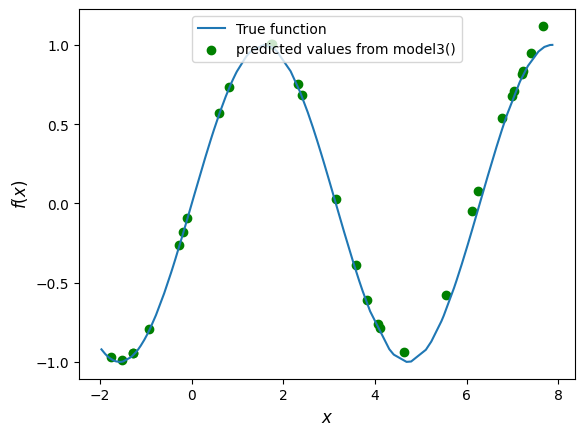

In [31]:
x_new = np.sort((10*np.random.rand(30)-2).reshape(-1,1))
x_new = torch.Tensor(x_new)
y_pred = model3(x_new).detach().numpy()

plt.plot(x_sin,y_sin, label="True function")
plt.xlabel(r"$x$", fontsize=12)
plt.ylabel(r"$f(x)$", fontsize=12)
plt.scatter(x_new,y_pred.reshape(-1),c='g', label="predicted values from model3()")
plt.legend(loc = "upper center")